# 1.)Veri ön işleme

# Veri setimizin görüntülenmesi

In [42]:
# veri isleme(preprocessing)

import pandas as pd

# Var olan veri setini yükleme

dosyauzantisi = r"havadurumuveriseti.csv"

# Veri setinin okunup weather_data isimli değişkene atanması

weather_data = pd.read_csv(dosyauzantisi)



weather_data


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


# Veri setimizin veri sayısı ve niteliğinin paylaşılması

In [43]:
print(f"Veri setinde {weather_data.shape[0]} veri ve {weather_data.shape[1]} nitelik bulunmaktadır.")

Veri setinde 1461 veri ve 6 nitelik bulunmaktadır.


# Label encoder sınıfı ile weather altındaki kategorik verileri sayısal etiketlere dönüştürme

# LabelEncoder, kategorik verileri sayısal etiketlere dönüştüren bir sınıftır. fit_transform metodu, iki adımı birleştirir:

# Fit (Öğrenme): Kategorik verilerdeki benzersiz değerleri öğrenir ve her bir benzersiz değere bir sayısal etiket atar.
# Transform (Dönüşüm): Kategorik verileri, öğrenilen bu sayısal etiketlerle değiştirir.

In [44]:
from sklearn.preprocessing import LabelEncoder

# Veri setindeki tarih kolonunun silinmesi

weather_data = weather_data.drop(columns=["date"])

# LabelEncoder nesnesi oluşturma
label_encoder = LabelEncoder()

# Kategorik sütunu sayısal değerlere dönüştürme

weather_data['weather'] = label_encoder.fit_transform(weather_data['weather'])

print("Dönüştürülmüş veri:")
weather_data


Dönüştürülmüş veri:


,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


# Hangi sayının hangi kategorik veriye karşılık geldiğinin bulunması

# Şu ana kadar kategorik verilerimizi sayısallaştırdık ve min-max optimizasyonu ile veri optimizasyonu işlemlerini yaptık.Son olarak kafanızın karışmaması için tekrardan bizim weather niteliği altındaki numeric etiketlerin kategorik karşılıklarını yazdıralım.

In [45]:
# Bir sayısal etiketin hangi kategorik etikete ait olduğunu bulma

# Weather niteliği altındaki eşsiz olan tüm değerleri aldık.

essizolandegeler = weather_data['weather'].unique()

for i in range(5):

    

    categorical_label = label_encoder.inverse_transform([i])[0]

    


    print(f"{essizolandegeler[i]} değerine sahip olan sayısal etiket, '{categorical_label}' kategorik etikete aittir.")





0 değerine sahip olan sayısal etiket, 'drizzle' kategorik etikete aittir.
2 değerine sahip olan sayısal etiket, 'fog' kategorik etikete aittir.
4 değerine sahip olan sayısal etiket, 'rain' kategorik etikete aittir.
3 değerine sahip olan sayısal etiket, 'snow' kategorik etikete aittir.
1 değerine sahip olan sayısal etiket, 'sun' kategorik etikete aittir.


# Tüm niteliklerdeki aykırı verilerin bulunması.

In [46]:
import pandas as pd



# Aykırı değerleri tespit etme fonksiyonu
def aykiridegerleribul(dataframe, nitelik):
    ceyrek1 = dataframe[nitelik].quantile(0.25)
    ceyrek3 = dataframe[nitelik].quantile(0.75)
    ceyreklerarasifark = ceyrek3 - ceyrek1
    altsinir = ceyrek1 - (1.5 * ceyreklerarasifark)
    ustsinir = ceyrek3 + (1.5 * ceyreklerarasifark)
    aykiridegerler = dataframe[(dataframe[nitelik] < altsinir) | (dataframe[nitelik] > ustsinir)]
    return aykiridegerler
    

# Her sütun için aykırı değerleri bulma

for nitelik in weather_data.columns:
    aykiridegerler = aykiridegerleribul(weather_data, nitelik)
    if not aykiridegerler.empty:
        print(f"{nitelik} sütununda aykırı değerler:")
        print(aykiridegerler)
        print()
        
        
    else:
        print(f"{nitelik} sütununda aykırı değer yok.")

    




precipitation sütununda aykırı değerler:
      precipitation  temp_max  temp_min  wind  weather
1              10.9      10.6       2.8   4.5        2
3              20.3      12.2       5.6   4.7        2
16              8.1       3.3       0.0   5.6        3
17             19.8       0.0      -2.8   5.0        3
18             15.2      -1.1      -2.8   1.6        3
...             ...       ...       ...   ...      ...
1441           16.0       8.9       5.6   5.6        2
1446           21.8       6.7       3.9   6.0        2
1447           18.5       8.9       4.4   5.1        2
1450           27.4       5.6       2.8   4.3        2
1456            8.6       4.4       1.7   2.9        2

[206 rows x 5 columns]

temp_max sütununda aykırı değer yok.
temp_min sütununda aykırı değer yok.
wind sütununda aykırı değerler:
      precipitation  temp_max  temp_min  wind  weather
20              3.0       8.3       3.3   8.2        2
48              6.4       6.7       3.9   8.1        2
51 

# Boş değer olup olmadığı'nın kontrol edilmesi

In [47]:
# Boş verileri kontrol etme
if weather_data.isnull().any().any():
    print("Veri setinde boş veriler var.")
else:
    print("Veri setinde boş veri yok.")

Veri setinde boş veri yok.


#  Verimize ait bilgilerin gösterilmesi

In [48]:
weather_data.describe()

,precipitation,temp_max,temp_min,wind,weather
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136,2.752225
std,6.680194,7.349758,5.023004,1.437825,1.191380
min,0.000000,-1.600000,-7.100000,0.400000,0.000000
25%,0.000000,10.600000,4.400000,2.200000,2.000000
50%,0.000000,15.600000,8.300000,3.000000,2.000000
75%,2.800000,22.200000,12.200000,4.000000,4.000000
max,55.900000,35.600000,18.300000,9.500000,4.000000


# Kaç tane tekrarlı veri olduğunu bulur.


In [49]:
# Veri tekrarı kontrolu
if(weather_data.duplicated().any()):
    print("Tekrarlı veri bulunmamaktadır.")
    print("Tekrarsız veri : ")
    tekrarsızveri = weather_data
    print(tekrarsızveri)

else:
    # Tekrarlı satırları kaldırma
    tekrarsızveri = weather_data.drop_duplicates()
    print("Tekrarlı veriler kaldırıldı")
    print(tekrarsızveri)


Tekrarlı veri bulunmamaktadır.
Tekrarsız veri : 
      precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
1              10.9      10.6       2.8   4.5        2
2               0.8      11.7       7.2   2.3        2
3              20.3      12.2       5.6   4.7        2
4               1.3       8.9       2.8   6.1        2
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9        2
1457            1.5       5.0       1.7   1.3        2
1458            0.0       7.2       0.6   2.6        1
1459            0.0       5.6      -1.0   3.4        4
1460            0.0       5.6      -2.1   3.5        4

[1461 rows x 5 columns]


# Anlaşılmasını daha da kolaylaştırmak için veri setimizin nitelik isimlerini değiştirdik.

In [50]:
# Sütun ismini değiştirme
turkcelesmisveriseti = weather_data.rename(columns={'precipitation': 'yağış', 'temp_max': 'maksimum sıcaklık',"temp_min":"Minimum sıcaklık","wind":"Rüzgar","weather":"Hava durumu"})

print("Sütun isimleri değiştirildikten sonra:")
turkcelesmisveriseti

Sütun isimleri değiştirildikten sonra:


,yağış,maksimum sıcaklık,Minimum sıcaklık,Rüzgar,Hava durumu
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


# VERI GORSELLEŞTİRME

# Veri görselleştirmek için gerekli olan kütüphanelerin yüklenmesi

In [51]:
! pip install matplotlib seaborn 



# Yağış Dağılımındaki Aykırı Verileri Gösteren Kutu Grafik : 




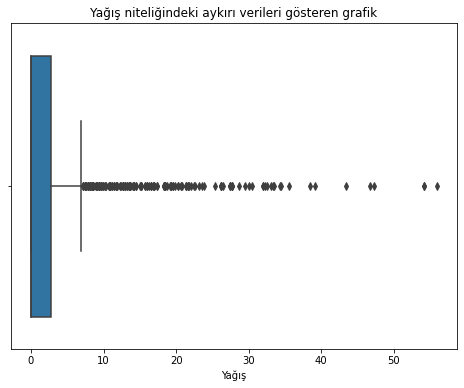

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=turkcelesmisveriseti['yağış'])
plt.title("Yağış niteliğindeki aykırı verileri gösteren grafik")
plt.xlabel("Yağış")
plt.show()


# Çıkarımlar

## 1.) Bu grafikte alt sınır 0'dır.

## 2.) Bu grafikte ise üst sınır yaklaşık olarak 0.1'e karşılık gelmektedir.

## 3.) Üst sınırın üstünde ise bizim veri setimizin yağış niteliğindeki aykırı verilerimiz karşılamaktadır.

## 4.)Bizim kutu grafiğimizin başlangıç noktası aynı zamanda veri setimizdeki 1.çeyreğ'in başlangıç kısmıdır ve kutu grafiğimizin bitiş kısmı veri setimizin 3.çeyrek kısmının başlangıç kısmıdır.

# Verisetinde rüzgar hızı niteliği altındaki aykırı verileri gösteren grafik


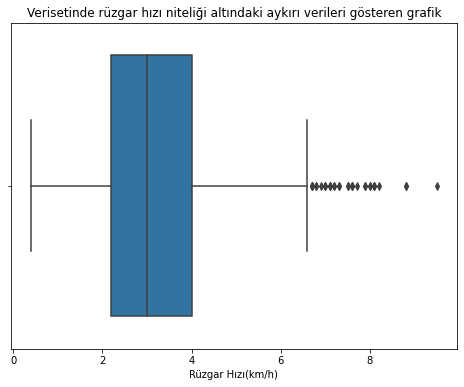

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=turkcelesmisveriseti['Rüzgar'])
plt.title("Verisetinde rüzgar hızı niteliği altındaki aykırı verileri gösteren grafik")
plt.xlabel("Rüzgar Hızı(km/h)")
plt.show()

# Çıkarımlar : 

## 1.) Bu grafikte alt sınır ve üst sınır yaklaşık olarak 0.7 olarak tespit edilmiştir.

## 2.) Buradaki kutu grafiğimizin 1.çeyrek değeri 0.2'ye,2.çeyrek yani medyan değeri yaklaşık olarak 0.3'e denk gelmektedir.

## 3.)Üst sınır olan 0.7(yaklaşık olarak)'nin üsttündeki veriler bizim veri setimizdeki aykırı verilerdir.

# maksimum sıcaklık niteliği altındaki aykırı verileri gösteren grafik : 

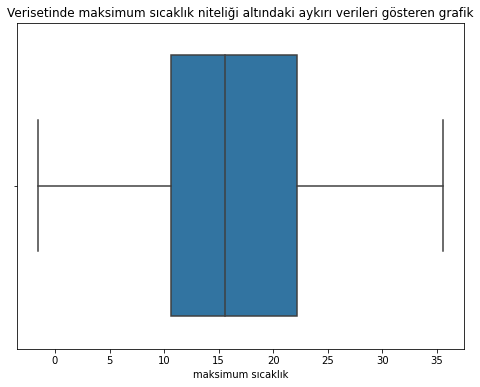

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=turkcelesmisveriseti['maksimum sıcaklık'])
plt.title("Verisetinde maksimum sıcaklık niteliği altındaki aykırı verileri gösteren grafik")
plt.xlabel("maksimum sıcaklık")
plt.show()

# Çıkarımlar 

## 1.) Alt sınır 0.0 ve üst sınır 1.0'dır.

## 2.) 1.çeyrek değeri yaklaşık olarak 0.35,3.çeyrek değeri ise 6.5'a eşittir.

## 3.) Bu grafiğe göre medyan ise 0.47 olarak tespit edilmiştir.

## 4.) Bu grafiğe göre alt sınırın altında veya üst sınırın üstünde herhangi bir aykırı veri bulunmamaktadır.


# Korelasyon Isı Haritası:

## Korelasyon ısı haritası;veri setimizdeki nitelikler arasındaki ilişkiler hakkında yorum yapmamızı sağlayan grafiktir.Biz bu grafikten yararlanarak en güçlü yada en zayıf ilişkiler hangi nitelikler arasında var bunu öğrenebiliriz.

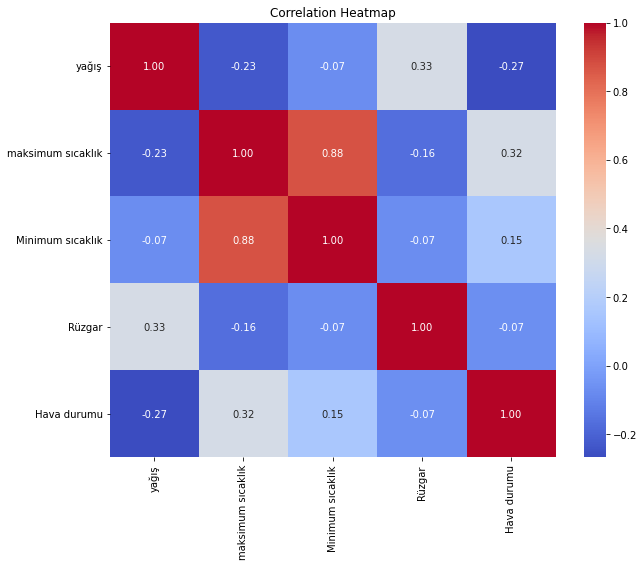

In [55]:
# Select only numeric columns
numeric_df = turkcelesmisveriseti.select_dtypes(include='number')

# Plot the heatmap with numeric data only
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(turkcelesmisveriseti.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



# Çıkarımlar :

## Öncelikle şunu iyi bilmeliyiz ki,-1 'e yakın değerlerde negatif yönlübir ilişki vardır,1'e yakın değerlerde ise pozitif yönlü bir ilişki vardır ama 0'a yakınsa mantıklı bir ilişkiden söz edemeyiz.

# Yukarıya baktığımızda max sıcaklık ve min sıcaklık arasındaki korelasyon 0.88 olarak tespit edilebilir.Yani bu değer 1'e yakın bir değer olduğu için min ve max sıcaklık arasında pozitif bir korelasyon olduğu sonucuna varabilriz.Bunutest etmek için isterseniz bir nokta grafik çizelim...

# Max ve min sıcaklık arasındaki ilişkiyi gösteren nokta grafik

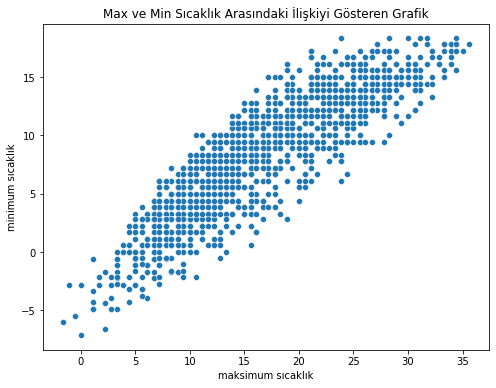

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=turkcelesmisveriseti['maksimum sıcaklık'], y=turkcelesmisveriseti['Minimum sıcaklık'])
plt.title("Max ve Min Sıcaklık Arasındaki İlişkiyi Gösteren Grafik")
plt.xlabel("maksimum sıcaklık")
plt.ylabel("minimum sıcaklık")
plt.show()


# Model eğitimi ve öodelin doğruluğunun test edilmesi için gerekli olan kütüphanelerin projeye dahil edilmesi

In [57]:
# Doğruluk oranını görüntüleyebilmem için gerekli olan accuracy_score parametresinin import edilmesi
 
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

# Stratified K Fold Cross Validation İşlemini Uygulayarak Veri setini Uygun Şekilde Bölünmesi Ve her Bir Katmanda Modeli Eğitip Test etme işleminin Yapılması

# Veri setimizin özellikler ve hedef değişken olarak bölünmesi

In [58]:

# Hedef değişkenin belirlenmesi
target_column = 'weather'
# Veri seti'nin özellikler (X) ve hedef değişken (y) olarak ayır
X = weather_data.drop(columns=[target_column])
y = weather_data[target_column]





# Stratified K-Fold Cross Validation Nesnesinin Oluşturulması

In [59]:
# nsplits : cross validation katman sayısı(kaç katmanlı bir cross validation işelmi yapacağız.)

# shuffle true değerine eşitse cross validation işleminin her katmanında veri seti karıştırılacak demektir.

# random state belirleyip aynı rastgele karıştırma işlemini elde ederek modelin eğitim süreci'nin aynı şekilde tekrarlanabilir olmasını sağlar

from sklearn.model_selection import StratifiedKFold


stratified_k_fold_cross_validation_nesnesi = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



# Her katman için ayrı cross validation yapılması

In [73]:
# Karar ağaçlar algoritması için modelin oluşturulması

dt_classifier = DecisionTreeClassifier()

# Her bir k katmanında cross-validation işleminin yapılması
for train_index, test_index in stratified_k_fold_cross_validation_nesnesi.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    
    # Modelin eğitilmesi

    dt_classifier.fit(X_train, y_train)
    
    # Modeli test etme ve performans analizi yapma
    predictions = dt_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)

Accuracy: 0.7542662116040956
Accuracy: 0.7226027397260274
Accuracy: 0.7397260273972602
Accuracy: 0.7636986301369864
Accuracy: 0.7773972602739726


# Random forest sınıflandırma algoritması ile modelin eğitilmesi,tahmin yaptırılması ve doğrulukm skorunun bulunması

In [61]:
# Sınıflamdırma için random forest classifier sınıfına projeye import edilmesi

from sklearn.ensemble import RandomForestClassifier

# Random forest sınıflandırma algoritması ile eğitilecek modelin oluşturulması

randomforestmodel = RandomForestClassifier()

# Modelimizin eğitilmesi

randomforestmodel.fit(X_train,y_train)

# Modelimize tahmin yaptırılması

tahminsonucları = randomforestmodel.predict(X_test)

dogrulukrf = accuracy_score(y_test,tahminsonucları)

print("Doğruluk Oranı : " + str(dogrulukrf))

Doğruluk Oranı : 0.8424657534246576


# Modelin performanısının değerlendirilip yorumlanması

0 değerine sahip olan sayısal etiket, 'drizzle' kategorik etikete aittir.

2 değerine sahip olan sayısal etiket, 'fog' kategorik etikete aittir.

4 değerine sahip olan sayısal etiket, 'rain' kategorik etikete aittir.

3 değerine sahip olan sayısal etiket, 'snow' kategorik etikete aittir.

1 değerine sahip olan sayısal etiket, 'sun' kategorik etikete aittir.

In [62]:
# Evaluate the model

from sklearn.metrics import classification_report

print(classification_report(y_test, tahminsonucları))



              precision    recall  f1-score   support

           0       0.17      0.10      0.12        10
           1       0.27      0.15      0.19        20
           2       0.97      0.95      0.96       128
           3       0.67      0.67      0.67         6
           4       0.81      0.91      0.86       128

    accuracy                           0.84       292
   macro avg       0.58      0.56      0.56       292
weighted avg       0.82      0.84      0.83       292



Precision (Kesinlik): Precision, pozitif sonuçların ne kadarının gerçekten pozitif olduğunu gösterir. Yani, doğru pozitiflerin toplam pozitif tahminlere oranıdır. Örneğin, sınıf drizzle precision 0.20 dir, modelin sınıf 0 olarak tahmin ettiği gözlemlerin yalnızca %20'sinin gerçekten drizzle olduğu anlamına gelir.

Recall (Duyarlılık): Recall, gerçek pozitiflerin ne kadarının rastgele orman algoritması tarafından doğru bir şekilde tanımlandığını gösterir. Yani, doğru pozitiflerin gerçek pozitifler içindeki oranıdır. Örneğin, sun için recall 0.12 ise, gerçek sun gözlemlerinin yalnızca %12'sinin model tarafından doğru bir şekilde tanımlandığı anlamına gelir.

F1-score: F1-score, precision ve recall metriklerinin harmonik ortalamasını temsil eder. Bu, precision ve recall arasında bir denge sağlar. F1-score ne kadar yüksekse, modelin performansının o kadar iyi olduğu düşünülür. F1-score, precision ve recall değerlerinin dengeli olduğu durumlarda yüksektir.

Support (Destek): Support, her bir sınıf için gerçek değerlerin sayısını temsil eder. Yani, her sınıf için kaç tane gözlem olduğunu gösterir.

Accuracy (Doğruluk): Accuracy, modelin doğru tahmin ettiği toplam gözlem sayısının, tüm gözlem sayısına oranını gösterir. Yani, doğru tahmin edilen gözlemlerin tüm gözlemlere oranıdır.

Macro Average ve Weighted Average: Macro avg, her sınıfın metriklerinin (precision, recall, f1-score) ortalamasını alırken, weighted avg, sınıf sayısına göre ağırlıklı ortalama alır.

# KNN(En Yakın Komşu) Algoritması İle Modelimizin Eğitilmesi ve doğruluk oranının bulunması 

In [63]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Test ve eğitim verisi olarak hedef değişken ve özelliklerin ayrılması

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# En yakın komşu sınıflandırma algortması için modelin tanımlanması

# en yakın 5 komşunun etiketlerinin göz önünde bulundurulması

enyakinkomsumodeli = KNeighborsClassifier(n_neighbors=5)

# En yakın komsu algortması ile modelin eğitilmesi

enyakinkomsumodeli.fit(X_train,y_train)

# Modelimize tahmin yaptırılması

tahminsonucları = enyakinkomsumodeli.predict(X_test)

dogrulukknn = accuracy_score(y_test,tahminsonucları)

print("Doğruluk Oranı : " + str(dogrulukknn))



Doğruluk Oranı : 0.7681159420289855


# KNN(En Yakın Komşu) ve Random Forest Algoritmaları'nın Grafik üzerinde Karşılaştırılması

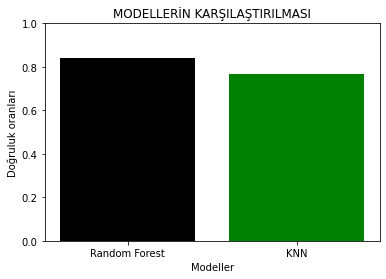

In [64]:
# Grafik oluşturma
models = ['Random Forest', 'KNN']
accuracies = [dogrulukrf, dogrulukknn]

plt.bar(models, accuracies, color=['black', 'green'])
plt.xlabel('Modeller')
plt.ylabel('Doğruluk oranları')
plt.title('MODELLERİN KARŞILAŞTIRILMASI')
plt.ylim(0.0, 1.0) # Y ekseninin aralığını ayarlama (0 ile 100 arası)
plt.show()

# Roc eğrisi grafiği


# ROC eğrisi, sınıflandırma modelinin performansını değerlendirmek için kullanılan bir grafiktir, özellikle sınıflandırma modelinin duyarlılığı ve özgüllüğünün değişimini gösterir.

# Roc eğrisinin çizdirilmesi için gerekli olan kütüphanlerin projeye import edilmesi

In [65]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Özellikler kısmındaki test verilerinin arasından farklı sınıf etiketleri'nin ayrıştırılması ve bu etiketlerin 2'li vektorlere donusturulmesi

In [66]:
# Özellikler bölümünün test verisi olarak ayrılan kısmında bulunan farklı sınıf etiketlerini ayırma

classes = np.unique(y_test)

# Çoklu sınıf etiketlerini 2'li vektörlere dönüştürme

y_test_bin = label_binarize(y_test, classes=classes)

# en yakın komsu modelini one vs. rest stratejisi ile sararak çoklu sınıflandırma problemini 2'li sınıflandırma problemine dönüştürme


In [67]:
# en yakın komsu modelini one vs. rest stratejisi ile sararak çoklu sınıflandırma problemini 2'li sınıflandırma problemine dönüştürür.
ovrstrategy = OneVsRestClassifier(enyakinkomsumodeli)
ovrstrategy.fit(X_train, y_train)
y_probs = ovrstrategy.predict_proba(X_test)


# Tüm sınıflar için döndürülen tahminler, sınıf etiketine göre sıralanır.

# Çoklu etiket durumunda her numunenin herhangi bir sayıda etiketi olabileceğini unutmayın. Bu, verilen numunenin söz konusu etikete sahip olmasının marjinal olasılığını döndürür. Örneğin, iki etiketin her ikisinin de belirli bir numuneye uygulanma olasılığının %90 olması tamamen tutarlıdır.

# Tek etiketli çok sınıflı durumda, döndürülen matrisin satırlarının toplamı 1 olur.

# Roc eğrisi grafik şablonunun oluşturulması

In [68]:
# Roc eğrisi grafik şablonunun oluşturulması

plt.figure(figsize=(8, 6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

# Roc eğrisinin grafiğini çizdiren fonksiyonunun yazılması

In [69]:
# y_true: Gerçek sınıf etiketlerini içeren dizidir. Bu, test setindeki gerçek sınıf etiketlerini temsil eder.

# y_prob: Sınıflandırma modelinin her bir sınıfa ait olma olasılıklarını içeren bir dizi veya matristir. 
# Özellikle, bu modelin test seti için ürettiği olasılık tahminlerini içerir.

# class_name: Çizilen ROC eğrisinin adını belirten bir dizedir. Bu, ilgili sınıfın adını veya bir tanımını içerebilir.

# Roc eğrisini çizdiren fonksiyon'un yazılması
def plot_roc_curve(y_true, y_prob, class_name):
    
    # roc_curve(y_true, y_prob): Bu işlev, ROC eğrisi için false positive rate (fpr) ve true positive rate (tpr) 
    # değerlerini hesaplar. y_true gerçek sınıf etiketlerini, y_prob ise tahmin edilen sınıf olasılıklarını içerir.
    # _ ise roc curve fonksiyonunun döndürdüğü üçüncü değerdir.Bu değer roc eğrisi için de önemsizdir.


    fpr, tpr , _ = roc_curve(y_true, y_prob)

    # false positive rate(fpr) ve true positive rate(tpr) oranlarının yardımıyla roc eğrisinin altında kalan alan'ın hesaplanması 

    roc_auc = auc(fpr, tpr)

    # Roc eğrisinin grafik üzerinde gösterilemesi,her sınıf etiketi için eğri çizdirilir ve auc değerleri etiket olarak bu grafiğin yanına yazdırılır
    # Bu her sınıf etiketi için elde edile roc eğrisi fpr ve tpr ile elde edilir.

    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')











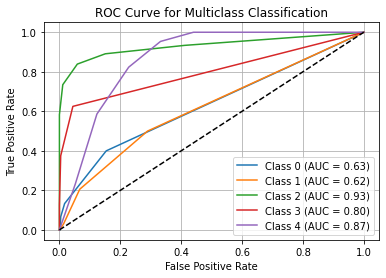

In [70]:
# Her class için roc eğrisinin çizdirilmesi

for i,class_name in enumerate(classes):
    plot_roc_curve(y_test_bin[:, i], y_probs[:, i], f'Class {class_name}')
     
   

# roc eğrilerinin çizdirilmesi
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# CONFUSION MATRİX HESAPLAMA

[[  1   1   0   0   8]
 [  0   7   0   0  13]
 [  1   1 123   1   2]
 [  0   0   2   4   0]
 [  8  19   9   0  92]]


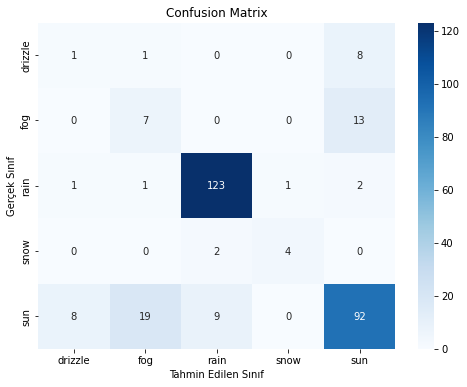

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix







# Confusion matrixi hesaplama
cm = confusion_matrix(y_test, predictions)

print(cm)

# Confusion matrixi görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',xticklabels=[label_encoder.classes_[0],label_encoder.classes_[1],label_encoder.classes_[2],label_encoder.classes_[3],label_encoder.classes_[4]],
            yticklabels=[label_encoder.classes_[0],label_encoder.classes_[1],label_encoder.classes_[2],label_encoder.classes_[3],label_encoder.classes_[4]])
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Confusion Matrix')
plt.show()




# Her hücre, dikey eksende belirtilen gerçek sınıfa ve yatay eksende belirtilen tahmin edilen sınıfa göre modelin performansını gösterir.
# Yanlış Tahminler:  "drizzle" olarak gerçek sınıfı olan verilerden 8 tanesi yanlışlıkla "sun" olarak tahmin edilmiş.
# "fog" olarak gerçek sınıfı olan verilerden 1 tanesi yanlışlıkla "freezing rain" olarak tahmin edilmiş.
# Başarılı Tahminler: Ana köşegen üzerinde yer alan sayılar (1, 7, 123, 4, 92) modelin doğru tahminlerini gösterir. Bu sayılar ne kadar yüksekse, modelin o sınıfı doğru tanıma oranı o kadar yüksek demektir.